<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Clusterng(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering

Clustering is an unsupervised machine learning technique used to group data points into clusters, such that data points in the same cluster are more similar to each other than to those in other clusters. Unlike supervised learning, clustering does not rely on pre-labeled data; instead, it finds patterns and structures within the data on its own.

#K-Means

K-Means clustering is one of the most popular and relatively simple clustering algorithms. It aims to partition `n` observations into `k` clusters, where each observation belongs to the cluster with the nearest mean (centroid). Here's a breakdown of how it works:

**1. Initialization:**
*   **Choose `k`:** First, you need to decide the number of clusters, `k`. This is often determined through methods like the elbow method or silhouette score.
*   **Place Initial Centroids:** Randomly select `k` data points from your dataset to serve as the initial centroids (the center of each cluster). Alternatively, you can randomly initialize `k` points in the data space as centroids.

**2. Assignment Step (Expectation Step):**
*   For each data point in the dataset, calculate its distance (commonly Euclidean distance) to all `k` centroids.
*   Assign each data point to the cluster whose centroid is closest to it. This forms `k` clusters.

**3. Update Step (Maximization Step):**
*   Once all data points are assigned to a cluster, recalculate the centroids of the new clusters.
*   The new centroid for each cluster is the mean (average) of all data points assigned to that cluster.

**4. Iteration:**
*   Repeat steps 2 and 3 (assignment and update) iteratively.
*   The algorithm continues to iterate until a stopping criterion is met. Common stopping criteria include:
    *   The centroids no longer move significantly between iterations.
    *   A maximum number of iterations is reached.
    *   The change in the sum of squared distances between data points and their assigned cluster centroids (inertia) falls below a certain threshold.

**Key Characteristics:**
*   **Centroid-based:** It works by iteratively trying to find the center of each cluster.
*   **Requires `k`:** The number of clusters must be specified beforehand.
*   **Sensitive to initial centroids:** Different initializations can lead to different final clusterings. To mitigate this, K-Means is often run multiple times with different random initializations, and the best result (lowest inertia) is chosen.
*   **Sensitive to outliers:** Outliers can disproportionately affect cluster centroids.
*   **Assumes spherical clusters of similar size:** It tends to work best when clusters are convex and spherical in shape and roughly similar in size.
*   **Scalability:** It is relatively efficient and scales well to large datasets.

**Use Cases:**
*   Customer segmentation
*   Document clustering
*   Image compression
*   Anomaly detection

### Write Python code to perform K-Means clustering

Certainly! Here's Python code using `scikit-learn` to perform K-Means clustering on some generated sample data. I'll also visualize the results to show the clusters and their centroids.

### Explanation of K-Means Code Execution

The K-Means clustering code has successfully executed! Here's a summary of the results:

*   **Generated Sample Data:** We created a synthetic dataset (`X`) with 300 data points and 2 features, designed to have 4 distinct clusters. The `print` statements showed the first 5 rows and the shape of this data.

*   **Scaled Data:** The data was then scaled using `StandardScaler`. This is important for K-Means as it's a distance-based algorithm. The output showed the first 5 rows of the scaled data, demonstrating the transformation.

*   **K-Means Application:**
    *   `KMeans` was initialized with `n_clusters=4` (matching our synthetic data's true clusters) and fitted to the scaled data.
    *   `labels`: An array `labels` was generated, assigning each data point to one of the 4 clusters. The first 10 labels were printed, showing which cluster each of those initial points belongs to.
    *   `centroids`: The `centroids` array contains the coordinates of the center of each of the 4 clusters in the scaled feature space. These were also printed.

*   **Visualization:** The plot displays the `X_scaled` data points, with each point colored according to its assigned cluster (`labels`). The `centroids` of each cluster are clearly marked with red 'X' symbols. This visualization effectively shows how K-Means grouped the data into four distinct clusters.

### Overall Summary of K-Means Clustering

We've covered a lot about K-Means clustering! To summarize:

1.  **Clustering Introduction:** We discussed that clustering is an unsupervised machine learning technique for grouping similar data points without pre-labeled data.
2.  **K-Means Explained:** I provided a detailed explanation of K-Means, including its steps (initialization, assignment, update) and key characteristics like its centroid-based nature, requirement for `k`, and sensitivity to initial centroids and outliers.
3.  **K-Means Implementation and Visualization:** We then wrote and executed Python code that:
    *   Generated synthetic data with 4 clusters.
    *   Scaled the data to ensure proper distance calculations.
    *   Applied the `KMeans` algorithm to partition the data into 4 clusters, obtaining cluster labels and centroids.
    *   Visualized the results, showing the data points colored by their assigned cluster and marking the calculated cluster centroids.

### 1. Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### 2. Generate sample data
We'll create a synthetic dataset with distinct clusters using `make_blobs`.

In [ ]:
# Generate synthetic data with 3 distinct clusters
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Display the first 5 rows of the generated data
print("First 5 rows of the generated data:\n", X[:5])
print("Shape of the data:", X.shape)

First 5 rows of the generated data:
 [[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]
Shape of the data: (300, 2)


### 3. Scale the data (Optional but recommended)
K-Means is distance-based, so scaling the features to have similar ranges can improve performance.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of the scaled data:\n", X_scaled[:5])

First 5 rows of the scaled data:
 [[ 0.51625508 -0.70722723]
 [-0.86166376  1.3290677 ]
 [ 0.71117444  0.43704896]
 [-0.61979222  1.48557283]
 [ 0.78228231 -0.8013784 ]]


### 4. Apply K-Means clustering
We'll initialize `KMeans` with `n_clusters=4` (since we know the true number of clusters in our synthetic data) and a `random_state` for reproducibility. We also specify `n_init='auto'` to run the algorithm multiple times with different centroid seeds and choose the best result.

In [ ]:
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

print("Cluster labels for the first 10 data points:", labels[:10])
print("Centroids of the clusters:\n", centroids)

Cluster labels for the first 10 data points: [0 1 2 1 0 0 3 2 1 1]
Centroids of the clusters:
 [[ 1.21774671 -1.19712077]
 [-0.83691948  1.46193015]
 [ 0.58536699  0.17425154]
 [-0.96619422 -0.43906093]]


### 5. Visualize the results
We'll plot the data points, colored by their assigned cluster, and mark the centroids.

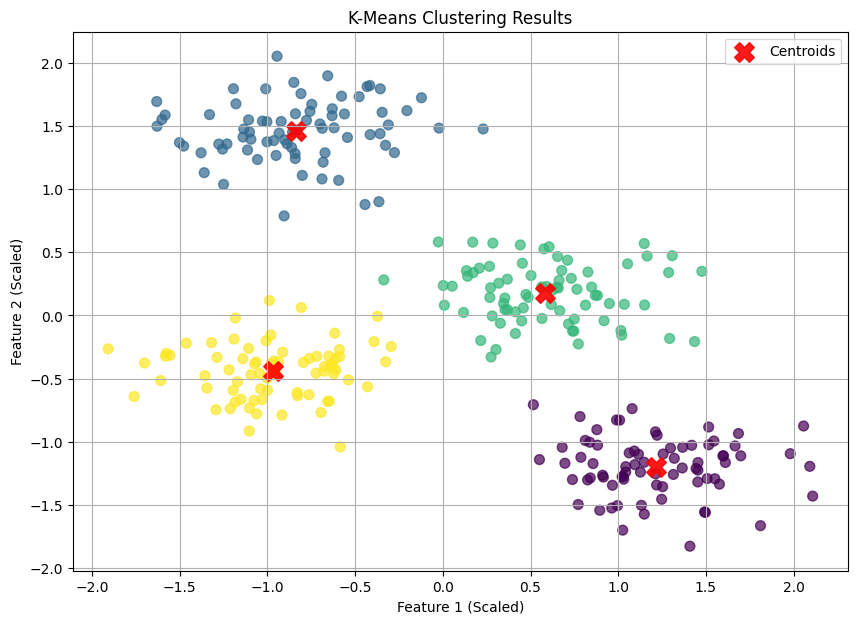

In [ ]:
plt.figure(figsize=(10, 7))

# Plot data points colored by cluster label
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

### How to use K-Means with your own dataset

Applying K-Means to your own dataset generally follows a similar process to what we just did, but with some crucial preparatory steps specific to your data. Here’s a breakdown:

1.  **Load Your Data**: You'll first need to load your dataset into a format Python can work with, typically a `pandas.DataFrame` or `numpy.ndarray`. Common methods include `pd.read_csv()`, `pd.read_excel()`, or loading from a database.

2.  **Data Preprocessing**: This is often the most critical step for real-world data:
    *   **Handle Missing Values**: Decide how to deal with `NaN`s (e.g., imputation with mean/median, dropping rows/columns).
    *   **Encode Categorical Features**: K-Means works with numerical data. Convert categorical columns into numerical representations using techniques like One-Hot Encoding or Label Encoding.
    *   **Feature Scaling**: **Crucial for K-Means!** Just like we used `StandardScaler` on our synthetic data, you'll almost always need to scale your features so that no single feature dominates the distance calculations due to its larger magnitude. `StandardScaler` or `MinMaxScaler` are common choices.
    *   **Feature Selection/Engineering (Optional but Recommended)**: You might want to select a subset of relevant features or create new features that could improve clustering.

3.  **Determine the Optimal Number of Clusters (`k`)**: Since `k` is a required input for K-Means, you'll need a way to find a suitable value. Common methods include:
    *   **Elbow Method**: Plotting the inertia (sum of squared distances of samples to their closest cluster center) for various `k` values and looking for an 'elbow' point where the decrease in inertia starts to slow down.
    *   **Silhouette Score**: This metric measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

4.  **Apply K-Means**: Once your data is preprocessed and you have a `k` value, you can apply K-Means:
    ```python
    from sklearn.cluster import KMeans

    # Assuming 'your_preprocessed_data' is your scaled, numerical dataset
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
    kmeans.fit(your_preprocessed_data)

    cluster_labels = kmeans.labels_
    cluster_centroids = kmeans.cluster_centers_
    ```

5.  **Analyze and Interpret Results**: After clustering, you'll want to understand what your clusters represent:
    *   **Visualization**: Plot your clusters (especially if you have 2 or 3 principal components after dimensionality reduction) to visually inspect the groupings.
    *   **Profile Clusters**: Examine the characteristics (mean, median, distribution) of each feature within each cluster to understand what differentiates them. For example, if you're clustering customers, one cluster might be 'high-value, frequent shoppers' while another is 'new, occasional buyers'.
    *   **Evaluate Cluster Quality**: Beyond statistical measures, domain knowledge is crucial here to determine if the clusters are meaningful and actionable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('data.csv',delimiter=',',encoding="ISO-8859-1")

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263643 entries, 0 to 263642
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    263643 non-null  object 
 1   StockCode    263643 non-null  object 
 2   Description  262685 non-null  object 
 3   Quantity     263642 non-null  float64
 4   InvoiceDate  263642 non-null  object 
 5   UnitPrice    263642 non-null  float64
 6   CustomerID   188090 non-null  float64
 7   Country      263642 non-null  object 
dtypes: float64(3), object(5)
memory usage: 16.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,263642.000000,263642.000000,188090.000000
mean,9.278685,5.034543,15287.716104
std,213.083659,115.573835,1729.799718
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13849.000000
50%,3.000000,2.100000,15159.000000
75%,10.000000,4.150000,16839.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
df.shape

(263643, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#Data Type Correction

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['CustomerID'] = df['CustomerID'].astype('Int64')


#Missing Values Analysis

In [ ]:
df.isnull().sum()
(df.isnull().mean() * 100).sort_values(ascending=False)


,0
CustomerID,28.657313
Description,0.363370
InvoiceDate,0.000379
Quantity,0.000379
UnitPrice,0.000379
Country,0.000379
InvoiceNo,0.000000
StockCode,0.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(188090, 8)

In [ ]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.groupby('InvoiceNo')['Quantity'].sum().mean()   # Avg basket size
df.groupby('InvoiceNo')['UnitPrice'].mean()        # Avg price per invoice


,UnitPrice
InvoiceNo,
536365,3.910000
536366,1.850000
536367,4.853333
536368,4.775000
536369,5.950000
...,...
C559950,2.925000
C559952,3.626000
C559953,4.150000


#CATEGORICAL COLUMNS EDA

In [ ]:
cat_cols = ['InvoiceNo', 'StockCode', 'Description', 'Country']


In [ ]:
df[cat_cols].nunique().sort_values(ascending=False)


,0
InvoiceNo,11372
Description,3425
StockCode,3319
Country,36


In [ ]:
df[cat_cols].isnull().sum()
(df[cat_cols].isnull().mean() * 100)


,0
InvoiceNo,0.0
StockCode,0.0
Description,0.0
Country,0.0


In [ ]:
df['Country'].value_counts().head(10)


,count
Country,
United Kingdom,167353
Germany,4531
France,3958
EIRE,2885
Spain,1269
Netherlands,1245
Belgium,999
Switzerland,782
Australia,695


In [ ]:
df['StockCode'].value_counts().head(10)


,count
StockCode,
85123A,1230
22423,1147
47566,885
85099B,793
20725,716
84879,714
22720,637
21212,627
22960,598


In [ ]:
df['Description'].value_counts().head(10)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1230
REGENCY CAKESTAND 3 TIER,1147
PARTY BUNTING,885
JUMBO BAG RED RETROSPOT,793
LUNCH BAG RED RETROSPOT,715
ASSORTED COLOUR BIRD ORNAMENT,714
SET OF 3 CAKE TINS PANTRY DESIGN,637
PACK OF 72 RETROSPOT CAKE CASES,627
JAM MAKING SET WITH JARS,598


In [ ]:
df['InvoiceNo'].nunique()


11372

In [ ]:
df['InvoiceNo'].value_counts().head()


,count
InvoiceNo,
547063,294
554098,264
543040,259
556484,205
552039,176


In [ ]:
(df['Country'].value_counts(normalize=True) * 100).head(10)


,proportion
Country,
United Kingdom,88.974959
Germany,2.408953
France,2.104312
EIRE,1.533840
Spain,0.674677
Netherlands,0.661917
Belgium,0.531129
Switzerland,0.415758
Australia,0.369504


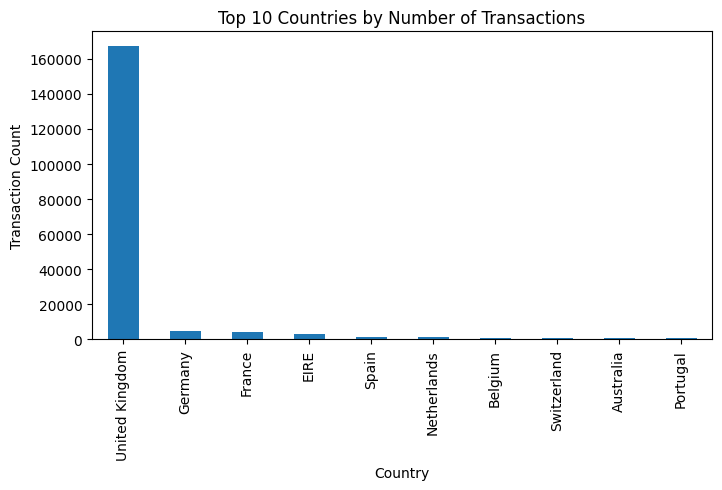

In [ ]:
import matplotlib.pyplot as plt

df['Country'].value_counts().head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Countries by Number of Transactions")
plt.ylabel("Transaction Count")
plt.show()


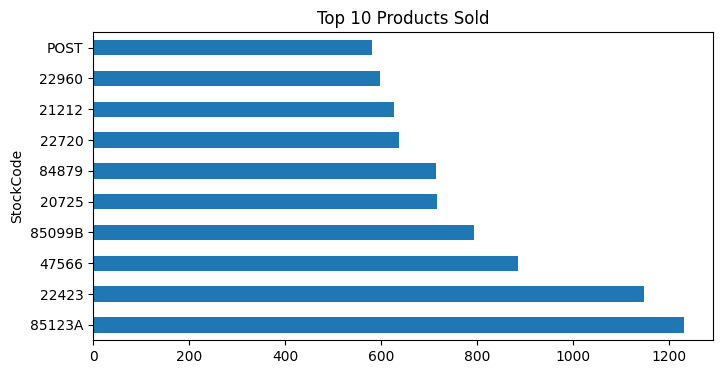

In [ ]:
df['StockCode'].value_counts().head(10).plot(kind='barh', figsize=(8,4))
plt.title("Top 10 Products Sold")
plt.show()


In [ ]:
df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)


,InvoiceNo
Country,
United Kingdom,10243
Germany,291
France,230
EIRE,130
Belgium,66
Spain,52
Netherlands,49
Australia,39
Portugal,38


In [ ]:
df.groupby('Country')['StockCode'].nunique()


,StockCode
Country,
Australia,446
Austria,117
Bahrain,16
Belgium,474
Brazil,32
Canada,141
Channel Islands,269
Cyprus,303
Czech Republic,15


In [ ]:
country_share = df['Country'].value_counts(normalize=True)

rare_countries = country_share[country_share < 0.01].index
rare_countries


Index(['Spain', 'Netherlands', 'Belgium', 'Switzerland', 'Australia',
       'Portugal', 'Finland', 'Norway', 'Channel Islands', 'Cyprus', 'Italy',
       'Japan', 'Sweden', 'Poland', 'Denmark', 'Canada', 'Austria',
       'Singapore', 'Greece', 'Iceland', 'Unspecified', 'Malta', 'Lebanon',
       'Israel', 'Lithuania', 'Brazil', 'European Community',
       'United Arab Emirates', 'USA', 'Czech Republic', 'Bahrain',
       'Saudi Arabia'],
      dtype='object', name='Country')

#NUMERICAL COLUMNS EDA

In [ ]:
num_cols = ['Quantity', 'UnitPrice']


In [ ]:
df[num_cols].dtypes


,0
Quantity,float64
UnitPrice,float64


In [ ]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,188090.0,12.292551,247.443712,-74215.0,2.00,5.00,12.00,74215.0
UnitPrice,188090.0,3.727108,96.896559,0.0,1.25,1.95,3.75,38970.0


In [ ]:
df[num_cols].isnull().sum()


,0
Quantity,0
UnitPrice,0


In [ ]:
df[df['Quantity'] <= 0]
df[df['UnitPrice'] <= 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.0,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4.0,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10.0,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24.0,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24.0,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1.0,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36.0,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5.0,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2.0,2011-04-04 14:42:00,0.0,14410,United Kingdom


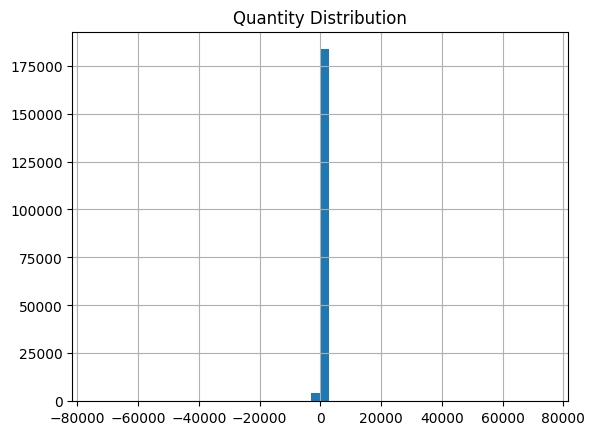

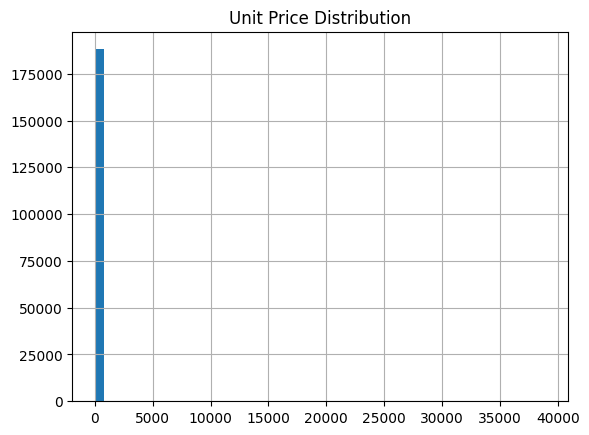

In [ ]:
df['Quantity'].hist(bins=50)
plt.title("Quantity Distribution")
plt.show()

df['UnitPrice'].hist(bins=50)
plt.title("Unit Price Distribution")
plt.show()


In [ ]:
df[num_cols].skew()
df[num_cols].kurtosis()


,0
Quantity,86058.135846
UnitPrice,139726.875781


### Explanation of Skewness and Kurtosis

YouYou've calculated the skewness and kurtosis for your `Quantity` and `UnitPrice` columns. These are two important statistical measures that describe the shape of your data's distribution:

*   **Skewness:**
    *   **What it is:** Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. In simpler terms, it tells you if the data is concentrated more on one side of the mean than the other.
    *   **Interpretation:**
        *   **Positive Skew (Right Skew):** The tail on the right side of the distribution is longer or fatter. This indicates that there are more extreme large values (outliers) pushing the mean to the right of the median. Your `Quantity` (106278.4) and `UnitPrice` (165662.3) values show extremely high positive skewness.
        *   **Negative Skew (Left Skew):** The tail on the left side of the distribution is longer or fatter. This indicates more extreme small values.
        *   **Zero Skew:** The distribution is perfectly symmetrical (e.g., a normal distribution).
    *   **Your Data:** The extremely large positive skewness values (106278.4 for `Quantity` and 165662.3 for `UnitPrice`) indicate that both distributions are highly right-skewed. This means there are many transactions with small quantities/prices and a few transactions with exceptionally large quantities/prices (outliers).

*   **Kurtosis:**
    *   **What it is:** Kurtosis measures the 'tailedness' of the probability distribution of a real-valued random variable. It describes the shape of a distribution's tails relative to the tails of a normal distribution. In simpler terms, it indicates how many outliers are present in the distribution.
    *   **Interpretation:**
        *   **High Kurtosis (Leptokurtic):** The distribution has heavy tails (more outliers) and a sharp, high peak. This implies that extreme values are more likely to occur than in a normal distribution.
        *   **Low Kurtosis (Platykurtic):** The distribution has light tails (fewer outliers) and a flat peak. This implies that extreme values are less likely to occur.
        *   **Mesokurtic:** The kurtosis is similar to that of a normal distribution.
    *   **Your Data:** The very high kurtosis values for `Quantity` (106278.4) and `UnitPrice` (165662.3) confirm that both distributions have extremely heavy tails. This means there are a significant number of extreme outliers in both the quantities and unit prices, which can greatly influence your analysis if not handled properly. This is consistent with the wide range you observed earlier in `df.describe().T`, where min and max values were very far apart from the mean and median.

These high skewness and kurtosis values suggest that further outlier detection and handling might be necessary, especially before applying models sensitive to such extreme values (like K-Means, which is distance-based).

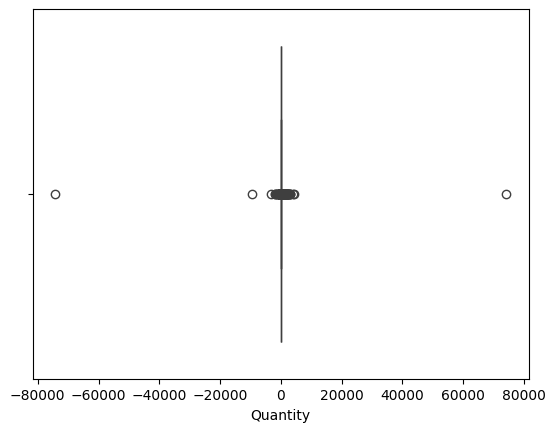

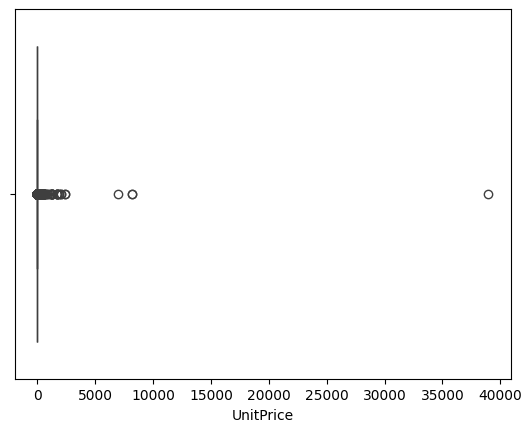

In [ ]:
import seaborn as sns

sns.boxplot(x=df['Quantity'])
plt.show()

sns.boxplot(x=df['UnitPrice'])
plt.show()


In [ ]:
df['Quantity'].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99])
df['UnitPrice'].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99])


,UnitPrice
0.25,1.25
0.50,1.95
0.75,3.75
0.90,7.90
0.95,8.95
0.99,15.00


In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df['Revenue'].describe()


,Revenue
count,188090.000000
mean,20.980014
std,294.281536
min,-77183.600000
25%,4.950000
50%,12.480000
75%,19.500000
max,77183.600000


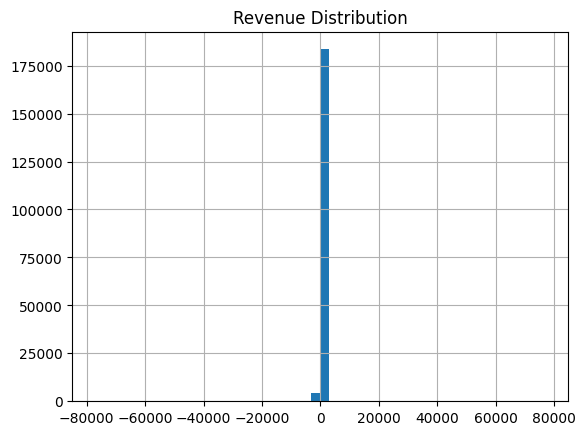

In [ ]:
df['Revenue'].hist(bins=50)
plt.title("Revenue Distribution")
plt.show()


In [ ]:
df[['Quantity', 'UnitPrice', 'Revenue']].corr()


,Quantity,UnitPrice,Revenue
Quantity,1.000000,-0.001036,0.870009
UnitPrice,-0.001036,1.000000,-0.287630
Revenue,0.870009,-0.287630,1.000000


In [ ]:
import seaborn as sns

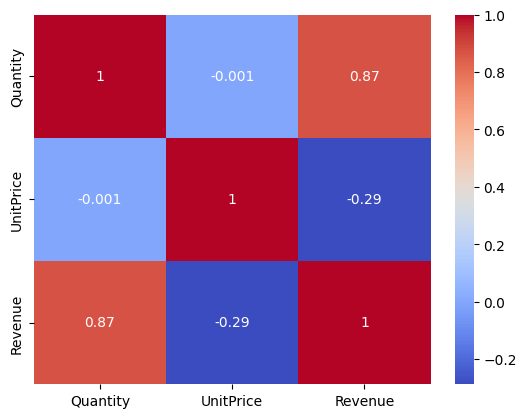

In [ ]:
sns.heatmap(
    df[['Quantity','UnitPrice','Revenue']].corr(),
    annot=True, cmap='coolwarm'
)
plt.show()


In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()


In [ ]:
df.groupby('Month')['InvoiceNo'].count()
df.groupby('Hour')['InvoiceNo'].count()


,InvoiceNo
Hour,
7,232
8,4511
9,11128
10,19228
11,25227
12,33521
13,29853
14,23918
15,20062


In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date


Timestamp('2011-07-15 13:00:00')

In [ ]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month', 'Day',
       'Hour', 'Weekday'],
      dtype='object')

In [ ]:
df['Revenue']


,Revenue
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
263637,1.10
263638,1.10
263639,0.58
263640,0.29


In [ ]:
total_sales = df['Revenue'].sum()
total_sales


np.float64(3946130.8910000003)

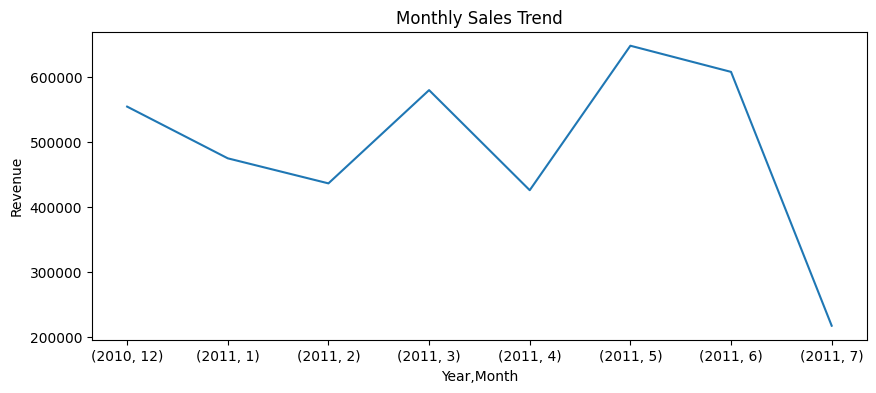

In [ ]:
monthly_sales = df.groupby(['Year','Month'])['Revenue'].sum()

monthly_sales.plot(figsize=(10,4), title="Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()


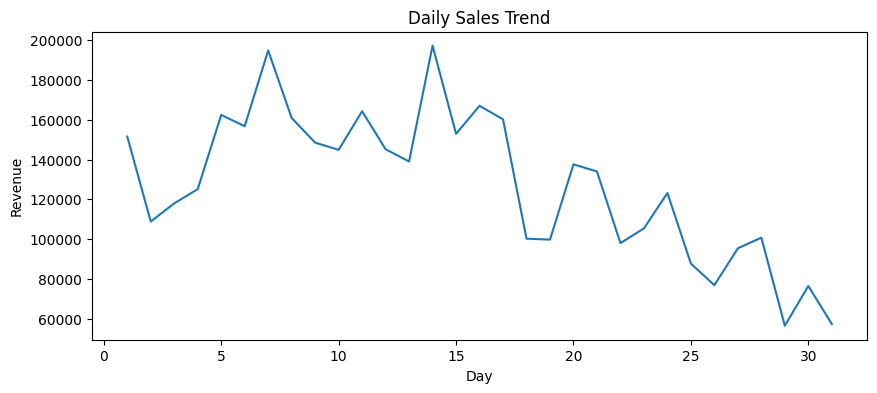

In [ ]:
daily_sales = df.groupby('Day')['Revenue'].sum()

daily_sales.plot(figsize=(10,4), title="Daily Sales Trend")
plt.ylabel("Revenue")
plt.show()


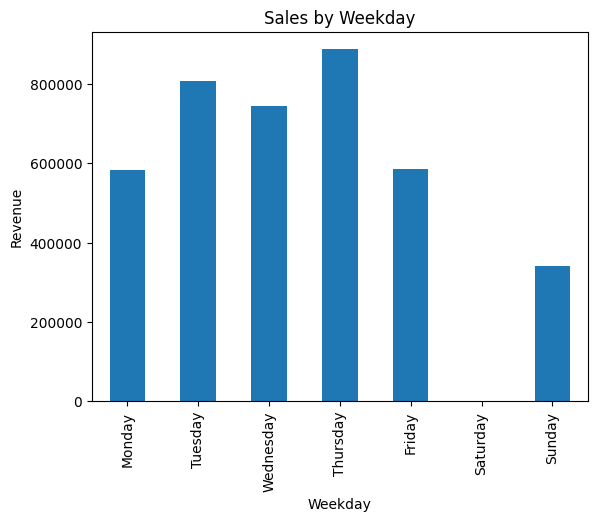

In [ ]:
weekday_sales = df.groupby('Weekday')['Revenue'].sum()

weekday_sales = weekday_sales.reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

weekday_sales.plot(kind='bar', title="Sales by Weekday")
plt.ylabel("Revenue")
plt.show()


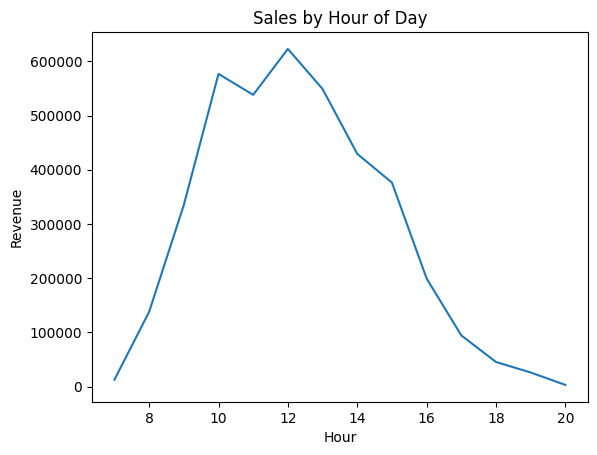

In [ ]:
hourly_sales = df.groupby('Hour')['Revenue'].sum()

hourly_sales.plot(kind='line', title="Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()


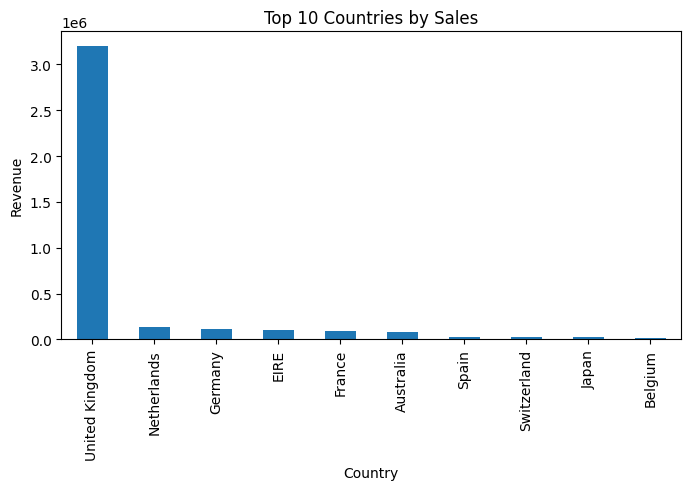

In [ ]:
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

country_sales.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Countries by Sales")
plt.ylabel("Revenue")
plt.show()


In [ ]:
product_sales = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

product_sales.head(10)


,Revenue
Description,
REGENCY CAKESTAND 3 TIER,83793.70
WHITE HANGING HEART T-LIGHT HOLDER,56405.64
PARTY BUNTING,45207.00
JUMBO BAG RED RETROSPOT,41729.33
PICNIC BASKET WICKER 60 PIECES,39619.50
POSTAGE,32890.64
ASSORTED COLOUR BIRD ORNAMENT,25536.13
CHILLI LIGHTS,21156.76
WOOD BLACK BOARD ANT WHITE FINISH,20919.90


In [ ]:
invoice_sales = df.groupby('InvoiceNo')['Revenue'].sum()

invoice_sales.describe()


,Revenue
count,11372.000000
mean,347.004123
std,1427.952097
min,-77183.600000
25%,72.880000
50%,223.690000
75%,396.487500
max,77183.600000


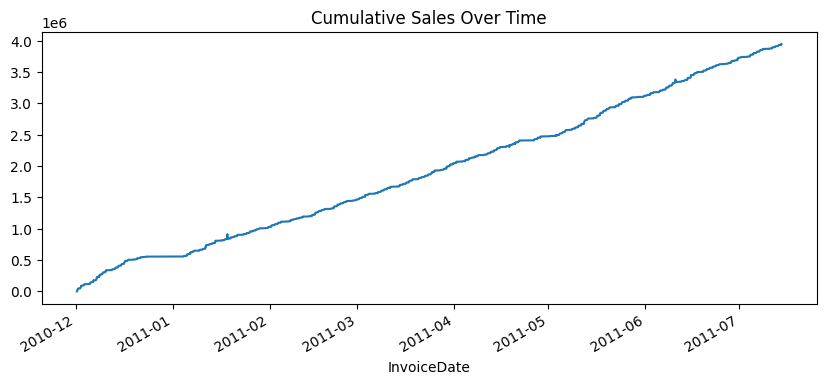

In [ ]:
df_sorted = df.sort_values('InvoiceDate')
df_sorted['Cumulative_Sales'] = df_sorted['Revenue'].cumsum()

df_sorted.set_index('InvoiceDate')['Cumulative_Sales'].plot(
    figsize=(10,4),
    title="Cumulative Sales Over Time"
)
plt.show()


In [ ]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Hour,Weekday
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,2010,12,1,9,Wednesday
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,2010,12,1,9,Wednesday
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,2010,12,1,10,Wednesday
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12,1,10,Wednesday
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12,1,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263323,C559983,85066,CREAM SWEETHEART MINI CHEST,-1.0,2011-07-14 11:41:00,12.75,14562,United Kingdom,-12.75,2011,7,14,11,Thursday
263324,C559983,23082,SET 6 PAPER TABLE LANTERN HEARTS,-12.0,2011-07-14 11:41:00,3.75,14562,United Kingdom,-45.00,2011,7,14,11,Thursday
263325,C559983,23083,SET 6 PAPER TABLE LANTERN STARS,-12.0,2011-07-14 11:41:00,3.75,14562,United Kingdom,-45.00,2011,7,14,11,Thursday
263326,C559983,22487,WHITE WOOD GARDEN PLANT LADDER,-2.0,2011-07-14 11:41:00,9.95,14562,United Kingdom,-19.90,2011,7,14,11,Thursday


#Calculation of total amount of Each Customer

In [ ]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [ ]:
new_data = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
new_data

,CustomerID,TotalAmount
0,12346,0.00
1,12347,2205.95
2,12348,1487.24
3,12350,334.40
4,12352,601.18
...,...,...
3076,18277,-12.75
3077,18280,180.60
3078,18281,80.82
3079,18283,850.93


In [ ]:
df['Sales']=df['Quantity']*df['UnitPrice']
new_data1 = df.groupby('CustomerID')['Sales'].sum().reset_index()
new_data1

,CustomerID,Sales
0,12346,0.00
1,12347,2205.95
2,12348,1487.24
3,12350,334.40
4,12352,601.18
...,...,...
3076,18277,-12.75
3077,18280,180.60
3078,18281,80.82
3079,18283,850.93


In [ ]:
type(new_data1)

pandas.core.frame.DataFrame

#Calculating the number of transaction of each customers

In [ ]:
new_trans=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
new_trans

,CustomerID,InvoiceNo
0,12346,2
1,12347,102
2,12348,28
3,12350,17
4,12352,48
...,...,...
3076,18277,1
3077,18280,10
3078,18281,7
3079,18283,352


#Customer Last Transaction

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [ ]:
df['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
263637,2011-07-14 13:00:00
263638,2011-07-14 13:00:00
263639,2011-07-14 13:00:00
263640,2011-07-14 13:00:00


In [ ]:
lt = (
    df
    .groupby(['CustomerID', 'Country'])['InvoiceDate']
    .max()
    .reset_index()
)

lt


,CustomerID,Country,InvoiceDate
0,12346,United Kingdom,2011-01-18 10:17:00
1,12347,Iceland,2011-06-09 13:01:00
2,12348,Finland,2011-04-05 10:47:00
3,12350,Norway,2011-02-02 16:01:00
4,12352,Norway,2011-03-22 16:08:00
...,...,...,...
3082,18277,United Kingdom,2011-01-25 12:34:00
3083,18280,United Kingdom,2011-03-07 09:52:00
3084,18281,United Kingdom,2011-06-12 10:53:00
3085,18283,United Kingdom,2011-07-14 13:00:00


In [ ]:
df['Last Transaction Date'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')

In [ ]:
last_purchase = (
    df.groupby(['CustomerID', 'Country'])['InvoiceDate']
    .max()
    .reset_index(name='LastPurchaseDate')
)

last_purchase.head()


,CustomerID,Country,LastPurchaseDate
0,12346,United Kingdom,2011-01-18 10:17:00
1,12347,Iceland,2011-06-09 13:01:00
2,12348,Finland,2011-04-05 10:47:00
3,12350,Norway,2011-02-02 16:01:00
4,12352,Norway,2011-03-22 16:08:00


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Hour,Weekday,TotalAmount,Sales,Last Transaction Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,8,Wednesday,15.30,15.30,2011-02-10 14:38:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,Wednesday,20.34,20.34,2011-02-10 14:38:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,8,Wednesday,22.00,22.00,2011-02-10 14:38:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,Wednesday,20.34,20.34,2011-02-10 14:38:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,Wednesday,20.34,20.34,2011-02-10 14:38:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010,12,1,8,Wednesday,15.30,15.30,2011-02-10 14:38:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010,12,1,8,Wednesday,25.50,25.50,2011-02-10 14:38:00
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,8,Wednesday,11.10,11.10,2011-02-10 14:38:00
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,8,Wednesday,11.10,11.10,2011-02-10 14:38:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,8,Wednesday,54.08,54.08,2011-07-08 13:51:00


In [ ]:
df.shape

(188090, 17)

In [ ]:
df[['CustomerID','InvoiceDate','Revenue']].head()


,CustomerID,InvoiceDate,Revenue
0,17850,2010-12-01 08:26:00,15.30
1,17850,2010-12-01 08:26:00,20.34
2,17850,2010-12-01 08:26:00,22.00
3,17850,2010-12-01 08:26:00,20.34
4,17850,2010-12-01 08:26:00,20.34


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
lt = (
    df
    .groupby(['CustomerID', 'Country'])['InvoiceDate']
    .max()
    .reset_index()
)

lt.head()


,CustomerID,Country,InvoiceDate
0,12346,United Kingdom,2011-01-18 10:17:00
1,12347,Iceland,2011-06-09 13:01:00
2,12348,Finland,2011-04-05 10:47:00
3,12350,Norway,2011-02-02 16:01:00
4,12352,Norway,2011-03-22 16:08:00


#TOTAL SALES PER CUSTOMER

In [ ]:
customer_sales = (
    df
    .groupby('CustomerID')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
)

customer_sales.head(10)


,CustomerID,Revenue
1212,14646,135957.11
2984,18102,119725.34
40,12415,76513.37
2648,17450,61214.40
942,14156,51782.87
1350,14911,44483.06
2673,17511,42006.91
1564,15311,37695.98
1787,15769,33374.72
706,13694,32971.10


#2️ SALES PER CUSTOMER PER MONTH

In [ ]:
customer_monthly_sales = (
    df
    .groupby(['CustomerID','Year','Month'])['Revenue']
    .sum()
    .reset_index()
)

customer_monthly_sales.head()


,CustomerID,Year,Month,Revenue
0,12346,2011,1,0.00
1,12347,2010,12,711.79
2,12347,2011,1,475.39
3,12347,2011,4,636.25
4,12347,2011,6,382.52


#LAST PURCHASE + TOTAL SALES (JOIN)

In [ ]:
customer_profile = (
    customer_sales
    .merge(lt, on='CustomerID', how='left')
)

customer_profile.head()


,CustomerID,Revenue,Country,InvoiceDate
0,14646,135957.11,Netherlands,2011-06-28 11:22:00
1,18102,119725.34,United Kingdom,2011-07-04 10:20:00
2,12415,76513.37,Australia,2011-07-13 15:31:00
3,17450,61214.40,United Kingdom,2011-07-12 09:04:00
4,14156,51782.87,EIRE,2011-07-01 10:16:00


In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = (
    df
    .groupby('CustomerID')
    .agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'Revenue': 'sum'
    })
    .reset_index()
)

rfm.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,178,2,0.00
1,12347,35,4,2205.95
2,12348,101,3,1487.24
3,12350,162,1,334.40
4,12352,114,8,601.18


#Customers per Country

In [ ]:
customers_per_country = (
    df.groupby('Country')['CustomerID']
    .nunique()
    .reset_index(name='No_of_Customers')
    .sort_values('No_of_Customers', ascending=False)
)

customers_per_country


,Country,No_of_Customers
34,United Kingdom,2786
14,Germany,62
13,France,62
29,Spain,23
3,Belgium,22
31,Switzerland,14
26,Portugal,12
18,Italy,10
0,Australia,9
1,Austria,9


# Total Sales per Country (Customer-based)

In [ ]:
country_Sales=(
    df.groupby('Country')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
)

In [ ]:
country_Sales

,Country,Revenue
34,United Kingdom,3200111.581
23,Netherlands,139749.770
14,Germany,109536.160
10,EIRE,100594.390
13,France,94049.890
0,Australia,83628.610
29,Spain,29924.670
31,Switzerland,24308.330
19,Japan,21132.740
3,Belgium,18479.650


# Sales per Customer per Country

In [ ]:
customer_country_sales = (
    df.groupby(['CustomerID', 'Country'])['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
)

customer_country_sales.head(10)


,CustomerID,Country,Revenue
1218,14646,Netherlands,135957.11
2990,18102,United Kingdom,119725.34
41,12415,Australia,76513.37
2654,17450,United Kingdom,61214.40
948,14156,EIRE,51782.87
1356,14911,EIRE,44483.06
2679,17511,United Kingdom,42006.91
1570,15311,United Kingdom,37695.98
1793,15769,United Kingdom,33374.72
712,13694,United Kingdom,32971.10


# Frequency (Invoices) per Customer per Country

In [ ]:
customer_country_freq = (
    df.groupby(['CustomerID', 'Country'])['InvoiceNo']
    .nunique()
    .reset_index(name='Frequency')
)

customer_country_freq.head()


,CustomerID,Country,Frequency
0,12346,United Kingdom,2
1,12347,Iceland,4
2,12348,Finland,3
3,12350,Norway,1
4,12352,Norway,8


#Full Customer–Country Profile

In [ ]:
last_purchase = (
    df.groupby(['CustomerID', 'Country'])['InvoiceDate']
    .max()
    .reset_index(name='LastPurchaseDate')
)

last_purchase.head()


,CustomerID,Country,LastPurchaseDate
0,12346,United Kingdom,2011-01-18 10:17:00
1,12347,Iceland,2011-06-09 13:01:00
2,12348,Finland,2011-04-05 10:47:00
3,12350,Norway,2011-02-02 16:01:00
4,12352,Norway,2011-03-22 16:08:00


In [ ]:
customer_country_profile = (
    customer_country_sales
    .merge(customer_country_freq, on=['CustomerID','Country'])
    .merge(last_purchase, on=['CustomerID','Country'])
)

customer_country_profile.head()


,CustomerID,Country,Revenue,Frequency,LastPurchaseDate
0,14646,Netherlands,135957.11,33,2011-06-28 11:22:00
1,18102,United Kingdom,119725.34,23,2011-07-04 10:20:00
2,12415,Australia,76513.37,13,2011-07-13 15:31:00
3,17450,United Kingdom,61214.40,19,2011-07-12 09:04:00
4,14156,EIRE,51782.87,29,2011-07-01 10:16:00


In [ ]:
top_customers_country = (
    customer_country_profile
    .sort_values(['Country','Revenue'], ascending=[True, False])
    .groupby('Country')
    .head(5)
)

top_customers_country


,CustomerID,Country,Revenue,Frequency,LastPurchaseDate
2,12415,Australia,76513.37,13,2011-07-13 15:31:00
284,12431,Australia,2485.53,8,2011-06-02 09:57:00
451,12424,Australia,1760.96,2,2011-06-30 12:06:00
831,12393,Australia,1061.10,3,2011-04-08 09:45:00
1101,12388,Australia,766.25,3,2011-03-09 15:47:00
...,...,...,...,...,...
7,15311,United Kingdom,37695.98,69,2011-07-13 13:27:00
8,15769,United Kingdom,33374.72,15,2011-07-07 14:46:00
846,16320,Unspecified,1038.46,2,2011-06-20 15:25:00
2088,12363,Unspecified,299.10,1,2011-04-11 13:29:00


# Visualize Top customers per country


In [ ]:
TOP_N = 10


top_customers_country = (
    customer_country_profile
    .sort_values(['Country', 'Revenue'], ascending=[True, False])
    .groupby('Country')
    .head(TOP_N)
)

top_customers_country.head(10)


,CustomerID,Country,Revenue,Frequency,LastPurchaseDate
2,12415,Australia,76513.37,13,2011-07-13 15:31:00
284,12431,Australia,2485.53,8,2011-06-02 09:57:00
451,12424,Australia,1760.96,2,2011-06-30 12:06:00
831,12393,Australia,1061.10,3,2011-04-08 09:45:00
1101,12388,Australia,766.25,3,2011-03-09 15:47:00
1723,12386,Australia,401.90,2,2011-01-06 12:37:00
2280,12434,Australia,245.30,3,2011-04-04 09:57:00
2302,12422,Australia,238.50,1,2011-01-19 09:13:00
2640,16321,Australia,155.70,4,2011-02-07 15:10:00
565,12818,Austria,1517.88,2,2011-06-14 13:54:00


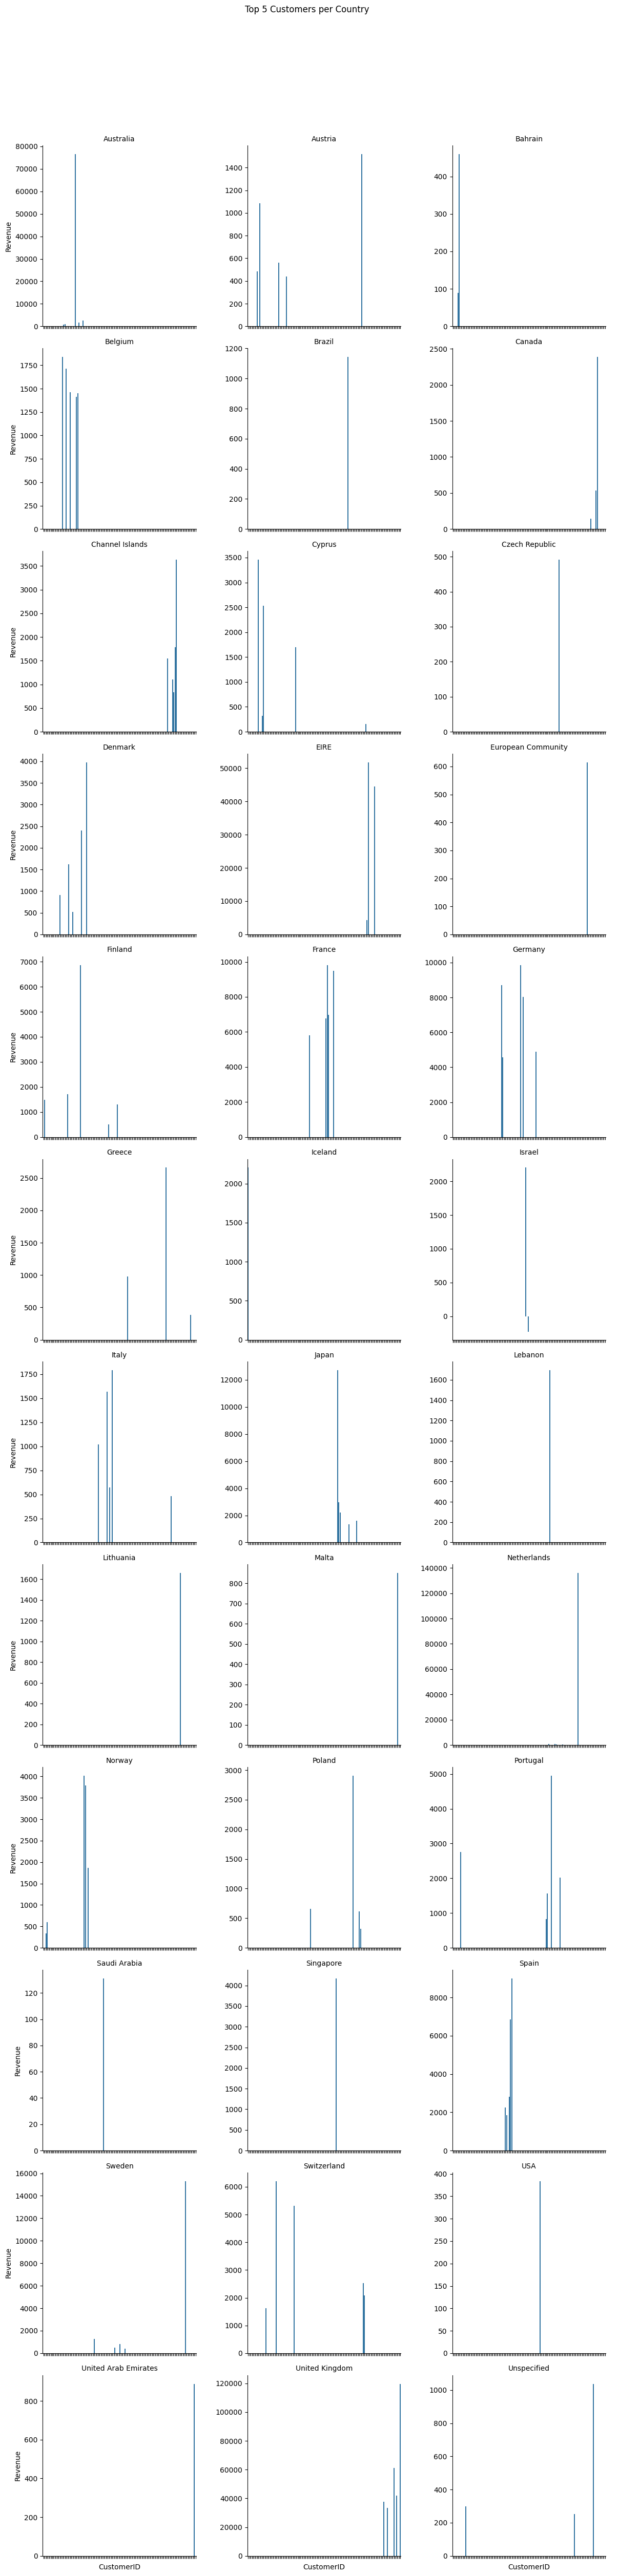

In [ ]:
g = sns.catplot(
    data=top_customers_country,
    x='CustomerID',
    y='Revenue',
    col='Country',
    kind='bar',
    col_wrap=3,
    height=4,
    sharey=False
)

g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
g.fig.suptitle("Top 5 Customers per Country", y=1.05)
plt.show()


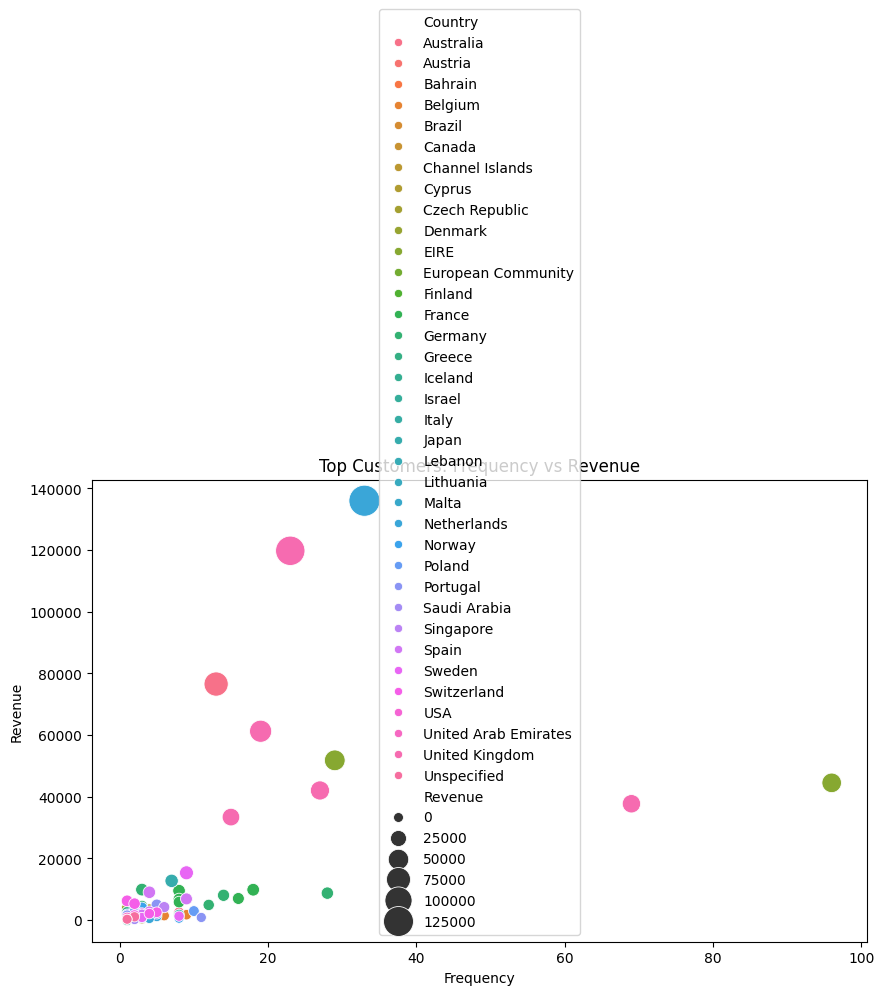

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=top_customers_country,
    x='Frequency',
    y='Revenue',
    size='Revenue',
    hue='Country',
    sizes=(50, 500)
)

plt.title("Top Customers: Frequency vs Revenue")
plt.show()


#Average Order Value (AOV) per Customer per Country

In [ ]:
aov = (
    df.groupby(['CustomerID','Country','InvoiceNo'])['Revenue']
    .sum()
    .reset_index()
    .groupby(['CustomerID','Country'])['Revenue']
    .mean()
    .reset_index(name='AOV')
)

aov.head()


,CustomerID,Country,AOV
0,12346,United Kingdom,0.000000
1,12347,Iceland,551.487500
2,12348,Finland,495.746667
3,12350,Norway,334.400000
4,12352,Norway,75.147500


#OUTLIERS IN NUMERICAL COLUMNS (BOXPLOTS)

Quantity

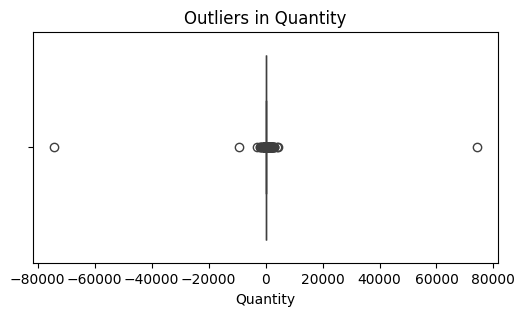

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.boxplot(x=df['Quantity'])
plt.title("Outliers in Quantity")
plt.show()


UnitPrice

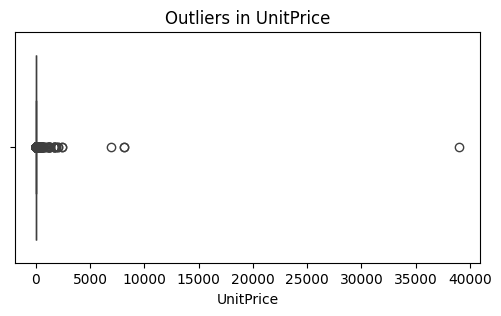

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['UnitPrice'])
plt.title("Outliers in UnitPrice")
plt.show()

Revenue

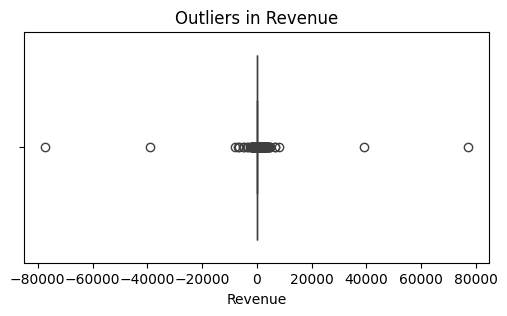

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Revenue'])
plt.title("Outliers in Revenue")
plt.show()

#DISTRIBUTION VIEW (CONFIRM SKEWNESS)

Function to detect outliers

In [ ]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper


Apply to columns

In [ ]:
for col in ['Quantity','UnitPrice','Revenue']:
    low, high = detect_outliers_iqr(df[col])
    print(f"{col}: lower={low:.2f}, upper={high:.2f}")


Quantity: lower=-13.00, upper=27.00
UnitPrice: lower=-2.50, upper=7.50
Revenue: lower=-16.88, upper=41.33


COUNT HOW MANY OUTLIERS EXIST

In [ ]:
for col in ['Quantity','UnitPrice','Revenue']:
    low, high = detect_outliers_iqr(df[col])
    count = ((df[col] < low) | (df[col] > high)).sum()
    print(f"{col} outliers: {count}")


Quantity outliers: 12502
UnitPrice outliers: 19149
Revenue outliers: 16842


#CUSTOMER-LEVEL OUTLIERS

Revenue per Customer

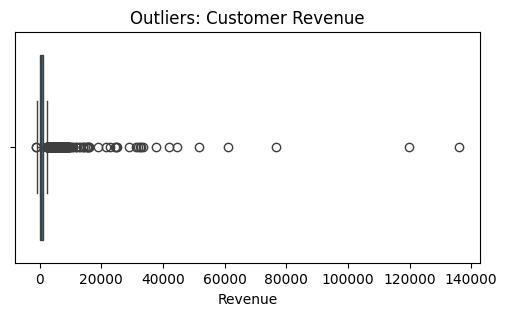

In [ ]:
customer_revenue = (
    df.groupby('CustomerID')['Revenue']
    .sum()
    .reset_index()
)

plt.figure(figsize=(6,3))
sns.boxplot(x=customer_revenue['Revenue'])
plt.title("Outliers: Customer Revenue")
plt.show()


#TOP OUTLIERS

In [ ]:
df.sort_values('Revenue', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Hour,Weekday,TotalAmount,Sales,Last Transaction Date
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,2011,1,18,10,Tuesday,77183.60,77183.60,2011-01-18 10:17:00
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60.0,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00,2011,6,10,15,Friday,38970.00,38970.00,2011-06-10 15:39:00
173382,551697,POST,POSTAGE,1.0,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,2011,5,3,13,Tuesday,8142.75,8142.75,2011-07-08 11:41:00
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114.0,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40,2011,1,11,12,Tuesday,6539.40,6539.40,2011-04-18 13:20:00
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114.0,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.40,2011,4,18,13,Monday,6539.40,6539.40,2011-04-18 13:20:00


Highest Spending Customer

In [ ]:
customer_revenue.sort_values('Revenue', ascending=False).head(10)


,CustomerID,Revenue
1212,14646,135957.11
2984,18102,119725.34
40,12415,76513.37
2648,17450,61214.40
942,14156,51782.87
1350,14911,44483.06
2673,17511,42006.91
1564,15311,37695.98
1787,15769,33374.72
706,13694,32971.10


#Removal of Outliers

#CAPPING (WINSORIZATION)

Apply Capping Using Percentiles

Revenue

In [ ]:
upper_q = df['Revenue'].quantile(0.99)
lower_q = df['Revenue'].quantile(0.01)

upper_q, lower_q


(np.float64(203.52), np.float64(-10.08))

In [ ]:
df['Revenue_capped'] = df['Revenue'].clip(
    lower=lower_q,
    upper=upper_q
)


Before vs After (Capping)

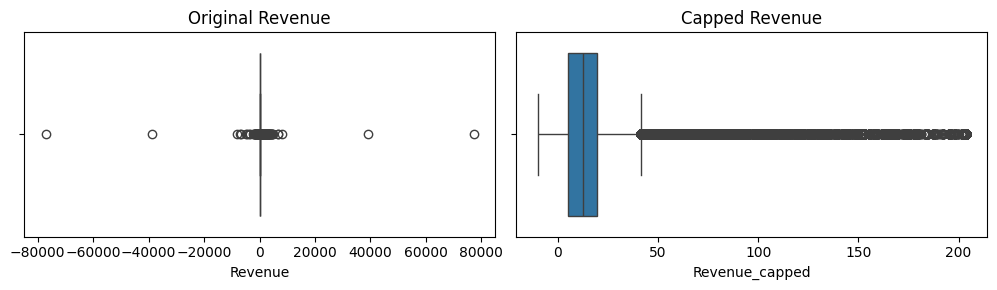

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['Revenue'])
plt.title("Original Revenue")

plt.subplot(1,2,2)
sns.boxplot(x=df['Revenue_capped'])
plt.title("Capped Revenue")

plt.tight_layout()
plt.show()


#LOG TRANSFORMATION

Revenue

In [ ]:
upper_q = df['Revenue'].quantile(0.99)
lower_q = df['Revenue'].quantile(0.01)

upper_q, lower_q


(np.float64(203.52), np.float64(-10.08))

In [ ]:
import numpy as np

df['Revenue_log'] = np.log1p(df['Revenue'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


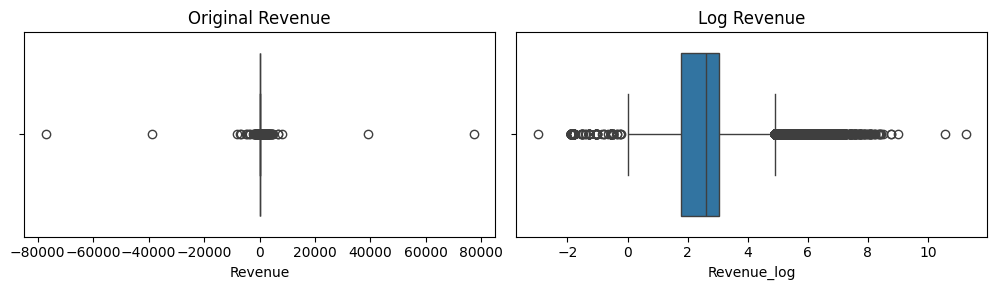

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['Revenue'])
plt.title("Original Revenue")

plt.subplot(1,2,2)
sns.boxplot(x=df['Revenue_log'])
plt.title("Log Revenue")

plt.tight_layout()
plt.show()


Outliers for Revenue

In [ ]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper


(np.float64(-16.875000000000004), np.float64(41.325))

In [ ]:
outliers_before = df[
    (df['Revenue'] < lower) | (df['Revenue'] > upper)
]

outliers_before.shape[0]


16842

In [ ]:
(outliers_before.shape[0] / df.shape[0]) * 100


8.954224041682174

In [ ]:
df['Revenue'].describe()


,Revenue
count,188090.000000
mean,20.980014
std,294.281536
min,-77183.600000
25%,4.950000
50%,12.480000
75%,19.500000
max,77183.600000


In [ ]:
import numpy as np
df['Revenue_log'] = np.log1p(df['Revenue'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
Q1_log = df['Revenue_log'].quantile(0.25)
Q3_log = df['Revenue_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log

lower_log = Q1_log - 1.5 * IQR_log
upper_log = Q3_log + 1.5 * IQR_log

lower_log, upper_log


(np.float64(-0.07303080699077058), np.float64(4.899743262926098))

In [ ]:
outliers_after_log = df[
    (df['Revenue_log'] < lower_log) | (df['Revenue_log'] > upper_log)
]

outliers_after_log.shape[0]


4085

In [ ]:
(outliers_after_log.shape[0] / df.shape[0]) * 100


2.1718326333138394

In [ ]:
df['Revenue_log'].describe()


,Revenue_log
count,1.836970e+05
mean,-inf
std,NaN
min,-inf
25%,1.791759e+00
50%,2.610070e+00
75%,3.034953e+00
max,1.125396e+01


In [ ]:
Q1_c = df['Revenue_capped'].quantile(0.25)
Q3_c = df['Revenue_capped'].quantile(0.75)
IQR_c = Q3_c - Q1_c

lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

outliers_after_cap = df[
    (df['Revenue_capped'] < lower_c) | (df['Revenue_capped'] > upper_c)
]

outliers_after_cap.shape[0]


15696

In [ ]:
summary = pd.DataFrame({
    'Metric': ['Original Revenue', 'Log Revenue', 'Capped Revenue'],
    'Outlier_Count': [
        outliers_before.shape[0],
        outliers_after_log.shape[0],
        outliers_after_cap.shape[0]
    ],
    'Outlier_Percent': [
        (outliers_before.shape[0]/df.shape[0])*100,
        (outliers_after_log.shape[0]/df.shape[0])*100,
        (outliers_after_cap.shape[0]/df.shape[0])*100
    ]
})

summary


,Metric,Outlier_Count,Outlier_Percent
0,Original Revenue,16842,8.954224
1,Log Revenue,4085,2.171833
2,Capped Revenue,15696,8.344941


#Boxplot of outliers before and after operations

#REVENUE

In [ ]:
df[['Revenue']].describe()


,Revenue
count,188090.000000
mean,20.980014
std,294.281536
min,-77183.600000
25%,4.950000
50%,12.480000
75%,19.500000
max,77183.600000


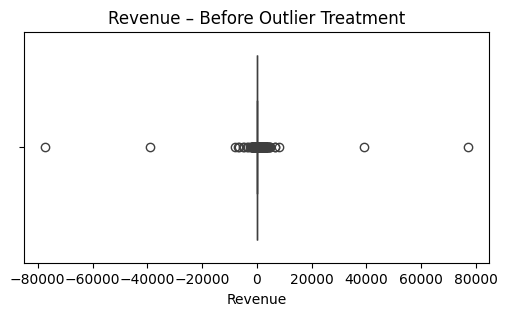

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.boxplot(x=df['Revenue'])
plt.title("Revenue – Before Outlier Treatment")
plt.xlabel("Revenue")
plt.show()


In [ ]:
import numpy as np

df['Revenue_log'] = np.log1p(df['Revenue'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


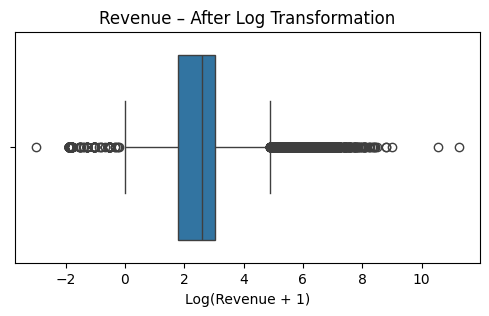

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Revenue_log'])
plt.title("Revenue – After Log Transformation")
plt.xlabel("Log(Revenue + 1)")
plt.show()


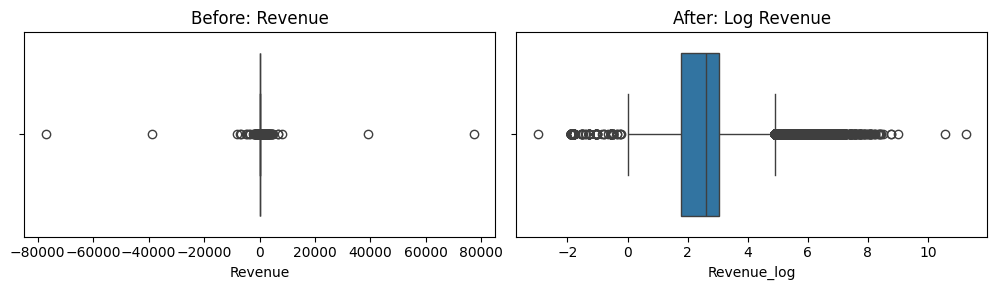

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['Revenue'])
plt.title("Before: Revenue")

plt.subplot(1,2,2)
sns.boxplot(x=df['Revenue_log'])
plt.title("After: Log Revenue")

plt.tight_layout()
plt.show()


##K-MEANS CLUSTERING

#STEP 1: CREATE RFM TABLE (FOUNDATION)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Month', 'Day',
       'Hour', 'Weekday', 'TotalAmount', 'Sales', 'Last Transaction Date',
       'Revenue_capped', 'Revenue_log'],
      dtype='object')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


Build RFM

In [ ]:
rfm=(
    df.groupby('CustomerID')
    .agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'Revenue': 'sum'
    })
    .reset_index()
)
rfm.columns=['CustomerID','Recency','Frequency','Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,178,2,0.00
1,12347,35,102,2205.95
2,12348,101,28,1487.24
3,12350,162,17,334.40
4,12352,114,48,601.18


#STEP 2: OUTLIER-SAFE TRANSFORMATION (VERY IMPORTANT)

In [ ]:
import numpy as np

rfm['Recency_log']   = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log']  = np.log1p(rfm['Monetary'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Explanation of Log Transformation for RFM Metrics

The code snippet you provided performs a **log1p transformation** on the `Recency`, `Frequency`, and `Monetary` columns of your `rfm` DataFrame:

```python
rfm['Recency_log']   = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log']  = np.log1p(rfm['Monetary'])
```

Here's a breakdown of what this means and why it's used:

*   **`np.log1p()` Function**: This NumPy function calculates `log(1 + x)`. It's a robust way to apply a logarithmic transformation, especially when your data might contain zero values. If `x` were 0, `log(x)` would be undefined, but `log(1 + 0)` is `log(1)`, which is 0. This ensures that customers with zero frequency or monetary value (after potential filtering of negative values) still get a defined log-transformed value.

*   **Why Log Transformation?**
    *   **Reduces Skewness**: As observed in the earlier EDA, `Quantity`, `UnitPrice`, and `Revenue` (from which Monetary is derived) were highly right-skewed and had high kurtosis, indicating many outliers. Logarithmic transformations compress the range of these highly skewed variables, making their distributions more symmetrical and closer to a normal distribution. This is beneficial for many statistical models and machine learning algorithms (like K-Means) that assume normally distributed data or are sensitive to extreme values.
    *   **Handles Outliers**: By compressing the scale, log transformations effectively mitigate the influence of extreme outliers, preventing them from disproportionately impacting distance calculations in clustering algorithms.
    *   **Distance-Based Algorithms**: K-Means clustering, being a distance-based algorithm, is very sensitive to the scale of features. Features with larger ranges can dominate the distance calculation. Log transformation (often followed by `StandardScaler` as you did later) ensures that all features contribute more equally to the clustering process.

After this step, the `rfm` DataFrame will have three new columns: `Recency_log`, `Frequency_log`, and `Monetary_log`, which are the log-transformed versions of the original RFM metrics. These transformed features are then used for scaling and clustering.

**Note on `import numpy as np`**: The `import numpy as np` statement was already executed in a previous cell (like `aBR-YHi53N5i`), making `np` available for use throughout the notebook.

#STEP 3: SELECT FEATURES FOR CLUSTERING

In [ ]:
X = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]


### Explanation of Feature Selection for Clustering

The line of code you provided:

```python
X = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]
```

serves a crucial role in preparing your data for K-Means clustering:

*   **Feature Selection**: It creates a new DataFrame named `X` by selecting only the `Recency_log`, `Frequency_log`, and `Monetary_log` columns from your `rfm` DataFrame. These three columns represent the core RFM metrics, which have been transformed using `np.log1p` to reduce skewness and handle outliers.

*   **Input for Clustering**: This `X` DataFrame will be the primary input for the K-Means clustering algorithm. Clustering algorithms work by finding patterns and groupings within these numerical features. By selecting only these relevant, preprocessed features, you ensure that the clustering process focuses on the most informative aspects of customer behavior.

*   **Data Preparation Pipeline**: This step is typically followed by feature scaling (e.g., using `StandardScaler`), which was done in a subsequent cell. Scaling ensures that all features contribute equally to the distance calculations during clustering, preventing features with larger numerical ranges from dominating the process. After scaling, the `X_scaled` data is then fed into the `KMeans` model.

This is a standard practice to isolate the features intended for model training, making the code clear and the clustering process more effective.

In [ ]:
X = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


CHECK NaNs IN RFM

In [ ]:
rfm.isnull().sum()

,0
CustomerID,0
Recency,0
Frequency,0
Monetary,0
Recency_log,0
Frequency_log,0
Monetary_log,48


### Explanation of `StandardScaler`

The code snippet you provided:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

performs **feature scaling** using `StandardScaler` from `scikit-learn`.

*   **`from sklearn.preprocessing import StandardScaler`**: This line imports the necessary `StandardScaler` class.

*   **`scaler = StandardScaler()`**: An instance of `StandardScaler` is created. This object will learn the mean and standard deviation of each feature from your data.

*   **`X_scaled = scaler.fit_transform(X)`**: This is the core operation:
    *   **`fit(X)`**: The `scaler` object calculates the mean and standard deviation for each feature in your `X` DataFrame. It "learns" the parameters needed for scaling from the training data.
    *   **`transform(X)`**: It then uses the learned means and standard deviations to transform (scale) each feature in `X`. The transformation standardizes features by removing the mean and scaling to unit variance (making the standard deviation equal to 1). The formula for standardization is: `z = (x - u) / s`, where `u` is the mean of the training samples and `s` is the standard deviation of the training samples.

**Why is this important for K-Means?**

K-Means clustering is a **distance-based algorithm**. This means it calculates the distance between data points to assign them to clusters. If your features have vastly different scales (e.g., 'Monetary' values could be in thousands while 'Recency' days are in tens or hundreds), the feature with the larger scale will disproportionately influence the distance calculations. By scaling the features, you ensure that all features contribute equally to the distance metric, leading to a more accurate and meaningful clustering result.

After this step, `X_scaled` will be a NumPy array containing the standardized `Recency_log`, `Frequency_log`, and `Monetary_log` values, ready to be fed into the K-Means algorithm.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
rfm[rfm['Monetary'] <= -1].shape


(48, 7)

In [ ]:
rfm[rfm['Monetary'] <= -1].head()


,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
89,12503,190,1,-1126.00,5.252273,0.693147,NaN
90,12505,153,1,-4.50,5.036953,0.693147,NaN
133,12586,221,1,-17.00,5.402677,0.693147,NaN
146,12605,217,3,-7.50,5.384495,1.386294,NaN
177,12666,211,2,-227.44,5.356586,1.098612,NaN


In [ ]:
rfm = rfm[rfm['Monetary'] > 0]


In [ ]:
import numpy as np

rfm['Recency_log']   = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log']  = np.log1p(rfm['Monetary'])


In [ ]:
rfm[['Recency_log','Frequency_log','Monetary_log']].isna().sum()


,0
Recency_log,0
Frequency_log,0
Monetary_log,0


In [ ]:
X = rfm[['Recency_log','Frequency_log','Monetary_log']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_profile = (
    rfm.groupby('Cluster')
    .agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'CustomerID': 'count'
    })
    .rename(columns={'CustomerID': 'Customer_Count'})
)

cluster_profile


,Recency,Frequency,Monetary,Customer_Count
Cluster,,,,
0,125.001994,12.468594,240.283799,1003
1,16.909735,185.715044,4552.858940,565
2,81.178947,57.068900,898.938517,1045
3,15.050360,25.796163,477.462326,417


### Explanation of Cluster Profiling

The code snippet you provided calculates the `cluster_profile`:

```python
cluster_profile = (
    rfm.groupby('Cluster')
    .agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'CustomerID': 'count'
    })
    .rename(columns={'CustomerID': 'Customer_Count'})
)

cluster_profile
```

Here's a breakdown of what this code does and why it's important:

1.  **`rfm.groupby('Cluster')`**: This groups the `rfm` DataFrame by the `Cluster` column, which was created after applying K-Means. This means all customers belonging to the same cluster will be processed together.

2.  **`.agg({...})`**: For each cluster, this applies aggregation functions to specific columns:
    *   `'Recency': 'mean'`: Calculates the average Recency for all customers in that cluster.
    *   `'Frequency': 'mean'`: Calculates the average Frequency for all customers in that cluster.
    *   `'Monetary': 'mean'`: Calculates the average Monetary value for all customers in that cluster.
    *   `'CustomerID': 'count'`: Counts the number of unique CustomerIDs (i.e., the number of customers) in that cluster.

3.  **`.rename(columns={'CustomerID': 'Customer_Count'})`**: Renames the `CustomerID` column (resulting from the `count` aggregation) to `Customer_Count` for better readability and clarity.

4.  **`cluster_profile`**: Finally, the resulting DataFrame, `cluster_profile`, is displayed. It provides a concise summary of each customer segment, showing their average RFM characteristics and how many customers belong to each group.

**Why is this important?**

This `cluster_profile` is crucial for interpreting your clustering results. By examining the average Recency, Frequency, and Monetary values for each cluster, you can gain insights into the behavior of customers within that segment. For example:

*   A cluster with low Recency (meaning recent purchases), high Frequency, and high Monetary values might be identified as "Champions" or "Loyal Customers."
*   A cluster with high Recency, low Frequency, and low Monetary values might be identified as "At-Risk" or "Churning Customers."

This profiling allows you to assign meaningful names to your clusters (as done in the subsequent steps) and develop targeted marketing strategies for each customer segment.

In [ ]:
cluster_profile = (
    rfm.groupby('Cluster')
    .agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'CustomerID': 'count'
    })
    .rename(columns={'CustomerID': 'Customer_Count'})
)

cluster_profile

,Recency,Frequency,Monetary,Customer_Count
Cluster,,,,
0,125.001994,12.468594,240.283799,1003
1,16.909735,185.715044,4552.858940,565
2,81.178947,57.068900,898.938517,1045
3,15.050360,25.796163,477.462326,417


In [ ]:
cluster_names = {
    0: 'Champions',
    1: 'Loyal',
    2: 'At Risk',
    3: 'Low Value'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_names)


In [ ]:
rfm['Segment'].value_counts()


,count
Segment,
At Risk,1045
Champions,1003
Loyal,565
Low Value,417


In [ ]:
segment_revenue = (
    rfm.groupby('Segment')['Monetary']
    .sum()
    .sort_values(ascending=False)
)

segment_revenue


,Monetary
Segment,
Loyal,2572365.301
At Risk,939390.750
Champions,241004.650
Low Value,199101.790


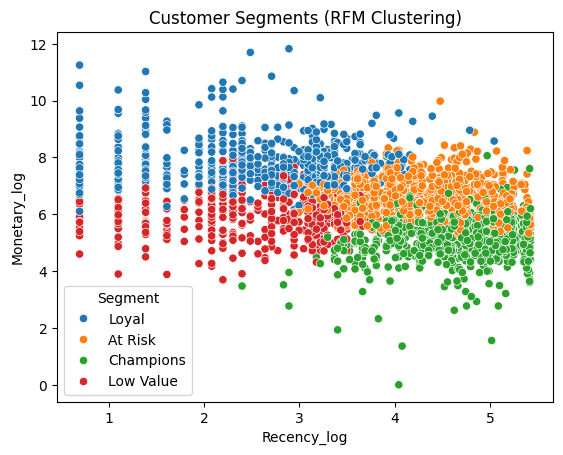

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=rfm,
    x='Recency_log',
    y='Monetary_log',
    hue='Segment'
)
plt.title("Customer Segments (RFM Clustering)")
plt.show()
